In [1]:
from urllib.request import urlopen
import json
import pandas as pd
import plotly.express as px
from eurostatapiclient import EurostatAPIClient
from nuts2 import codes_el

client = EurostatAPIClient('v2.1', 'json', 'en')

params = {'unit': 'MIO_EUR', 'geo': codes_el.keys()}
df = client.get_dataset('nama_10r_2gdp', params).to_dataframe()
df.dropna(inplace = True)
df['region_name'] = df['geo'].apply(lambda x: codes_el[x])
df['values'] = df['values'] / 1000
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2000-01-01 to 2019-01-01
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   values       260 non-null    float64
 1   unit         260 non-null    object 
 2   geo          260 non-null    object 
 3   region_name  260 non-null    object 
dtypes: float64(1), object(3)
memory usage: 10.2+ KB


In [2]:
nuts2_polygons = 'https://raw.githubusercontent.com/eurostat/Nuts2json/master/2021/4326/10M/nutsrg_2.json'
with urlopen(nuts2_polygons) as response:
    regions = json.load(response)

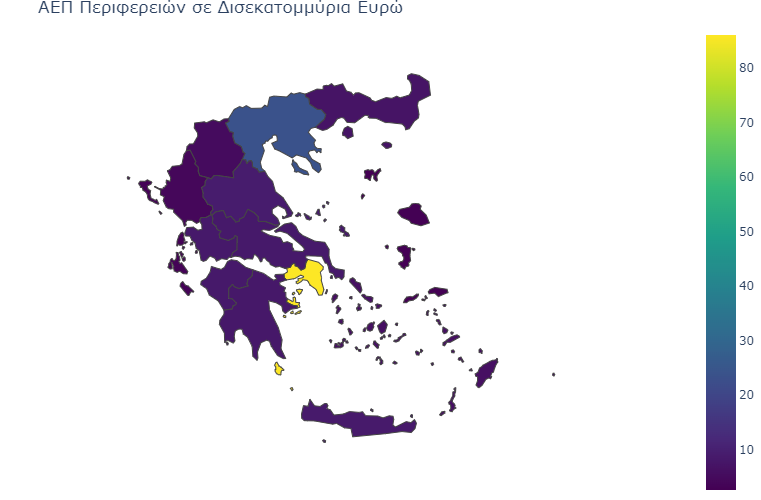

In [3]:
latest = str(df.index.year[-1])

hover_data = {'geo': False, 'values': False,
              'text': True}

hovertemplate = '%{customdata[0]}<br>%{customdata[1]:.2f} δις €'

fig = px.choropleth(df.loc['2013'], geojson = regions,
                    locations = 'geo', color = 'values',
                    featureidkey = 'properties.id',
                    color_continuous_scale="Viridis",
                    projection = 'mercator',
                    fitbounds = 'locations',
                    #animation_frame = 'time',
                    basemap_visible = False,
                    width = 700, height = 500,
                    custom_data = ['region_name', 'values'],
                    title = 'ΑΕΠ Περιφερειών σε Δισεκατομμύρια Ευρώ')

fig.update_traces(hovertemplate=hovertemplate)
fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0})
fig.update_coloraxes(colorbar_title_text="")
fig.show()